#### Fit a Hierarchical Clustering to the dataset with 5 clusters. Use the linkage method to be "ward" and distance as euclidean. Plot a dendrogram for the same.

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the data file
data=pd.read_csv('data.csv')
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Fe

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Converting Object to Str
data['Genre'].replace(['Male','Female'],[0,1],inplace=True)

In [5]:
#Pre-Processing
from sklearn.preprocessing import normalize
data_norm=normalize(data)
data_norm=pd.DataFrame(data_norm,columns=data.columns)
data_norm.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.000000,0.413826,0.326705,0.849433
1,0.023520,0.000000,0.246956,0.176397,0.952546
2,0.113228,0.037743,0.754851,0.603881,0.226455
3,0.048755,0.012189,0.280342,0.195020,0.938536
4,0.093234,0.018647,0.578052,0.316997,0.745874


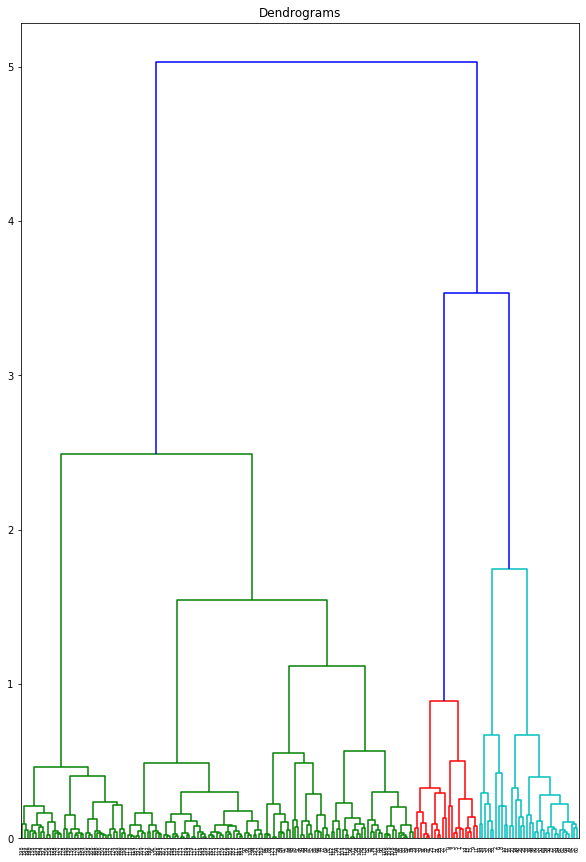

In [6]:
# Plot Dendrograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,15))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_norm,method='ward'))

In [7]:
# Clustering using Euclidean and linkage Ward
from sklearn.cluster import AgglomerativeClustering as AC
cluster = AC(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_norm)

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 2, 1, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int64)

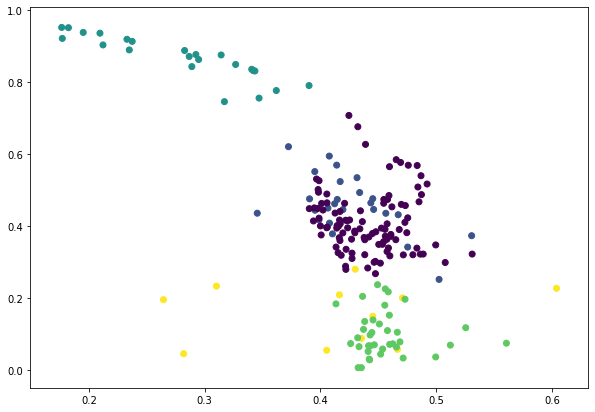

In [10]:
# Scatter plot Income Vs Spending
plt.figure(figsize=(10, 7))  
plt.scatter(data_norm['Annual Income (k$)'], data_norm['Spending Score (1-100)'], c=cluster.labels_)